Please use any image you want with the direction below for analysis.

For this question you will implement the k-means clustering algorithm and apply it to color an image your choice. you are allowed to use these Python packages: pandas, numpy, skimage.io, matplotlib. First use the following code to load the image, which will give you a handle (i.e., img) of a (244, 198, 3) numpy.ndarray. The first two dimensions represent the height and width of the image. The last dimension represents the 3 color channels (RGB) for each pixel of the image.

import skimage.io

import matplotlib.pyplot as plt

img = skimage.io.imread('your image')

skimage.io.imshow(img)

plt.show()

Next implement the k-means algorithm to partition the 244×198 pixels into k clusters based on their RGB values and the Euclidean distance measure. Run your experiment with k = 2, 3, 6, 10 with the following given starting centroids:

k = 2: (0, 0, 0), (0.1, 0.1, 0.1)

k = 3: (0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2)

k = 6: (0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3), (0.4, 0.4, 0.4), (0.5, 0.5, 0.5)

k = 10: (0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3), (0.4, 0.4, 0.4), (0.5, 0.5, 0.5), (0.6, 0.6, 0.6), (0.7, 0.7, 0.7), (0.8, 0.8, 0.8), (0.9, 0.9, 0.9)

For each value of k, you will run k-means until either convergence or your program has conducted 50 iterations over the data, whichever comes first.

Deliverables:

For each k = 2, 3, 6, 10, report the final SSE and re-color the pixels in each cluster using the following color scheme:

Cluster 1. SpringGreen: (60, 179, 113)

Cluster 2. DeepSkyBlue: (0, 191, 255)

Cluster 3. Yellow: (255, 255, 0)

Cluster 4. Red: (255, 0, 0)

Cluster 5. Black: (0, 0, 0)

Cluster 6. DarkGray: (169, 169, 169)

Cluster 7. DarkOrange: (255, 140, 0)

Cluster 8. Purple: (128, 0, 128)

Cluster 9. Pink: (255, 192, 203)

Cluster 10. White: (255, 255, 255)

Submit the SSE values and colored images for each k, together with your program code in your homework submission. Note: You should normalize the data as a preprocessing step before proceeding with the clustering. Because the range of RGB is [0, 255], so please do the normalization using (R/255, G/255, B/255).

## Python packages: pandas, numpy, skimage.io, matplotlib

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import io

## For each k = 2, 3, 6, 10, report the final SSE and re-color the pixels in each cluster using the following color scheme:

* Cluster 1. SpringGreen: (60, 179, 113)

* Cluster 2. DeepSkyBlue: (0, 191, 255)

* Cluster 3. Yellow: (255, 255, 0)

* Cluster 4. Red: (255, 0, 0)

* Cluster 5. Black: (0, 0, 0)

* Cluster 6. DarkGray: (169, 169, 169)

* Cluster 7. DarkOrange: (255, 140, 0)

* Cluster 8. Purple: (128, 0, 128)

* Cluster 9. Pink: (255, 192, 203)

* Cluster 10. White: (255, 255, 255)

In [2]:
color_dict = { 'SpringGreen' : (60, 179, 113),
               'DeepSkyBlue' : (0, 191, 255),
                'Yellow    ' : (255, 255, 0),                
                'Red'        : (255, 0, 0),                
                'Black'      : (0, 0, 0),                
                'DarkGray'   : (169, 169, 169),                
                'DarkOrange' : (255, 140, 0),                
                'Purple'     : (128, 0, 128),                
                'Pink'       : (255, 192, 203),                
                'White'      : (255, 255, 255)
             }
color_list = [   'SpringGreen',
                 'DeepSkyBlue' ,
                 'Yellow    ' ,
                 'Red'        ,
                 'Black'      ,
                 'DarkGray'   ,
                 'DarkOrange' ,
                 'Purple'     ,
                 'Pink'       ,
                 'White']

In [3]:
def plot(img):
#     plt.figure(figsize = (15,20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = color_dict[color_list[labels[label_idx]]]
            label_idx += 1
    image = np.array(image, dtype=np.float64) / 255
    return image



In [4]:
### Reading the image
img = io.imread("paris.jpg")
img1 = img.copy()

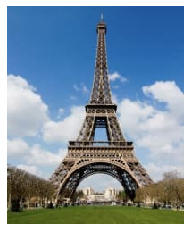

In [5]:
plot(img)

 #### (244, 198, 3) numpy.ndarray. The first two dimensions represent the height and width of the image. The last dimension represents the 3 color channels (RGB) for each pixel of the image.

In [6]:
### Use only this shape of images
img.shape

(244, 198, 3)

* k-means algorithm to partition the 244×198 pixels into k clusters based on their RGB values and the Euclidean distance measure. Run your experiment with k = 2, 3, 6, 10 with the following given starting centroids:

* k = 2: (0, 0, 0), (0.1, 0.1, 0.1)

* k = 3: (0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2)

* k = 6: (0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3), (0.4, 0.4, 0.4), (0.5, 0.5, 0.5)

* k = 10: (0, 0, 0), (0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.3, 0.3), (0.4, 0.4, 0.4), (0.5, 0.5, 0.5), (0.6, 0.6, 0.6), (0.7, 0.7, 0.7), (0.8, 0.8, 0.8), (0.9, 0.9, 0.9)


In [7]:
n_colors = 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

* For each value of k, you will run k-means until either convergence or your program has conducted 50 iterations over the data, whichever comes first.

In [8]:
k_list = [2, 3, 6, 10]
iterations = 50

In [9]:
def get_clusterd_img(image=img, n_clustes=2, iterations=50, plot_original_image=False, ):
    if plot_original_image:
        print("Original\n")
        plot(img)
    # Normalizing data
    img_ = np.array(img, dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(img_.shape)
    assert d == 3
    image_array = np.reshape(img_, (w * h, d))

    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_clustes, random_state=42, max_iter=iterations).fit(image_array_sample)

    # Get labels for all points
    print("Predicting color indices on the full image for {} Clusters".format(n_clustes))
    
    labels = kmeans.predict(image_array)
    sse = kmeans.inertia_
    
    print("\n SSE : {}".format(kmeans.inertia_))

    recreated_img = recreate_image(kmeans.cluster_centers_, labels, w, h)
    plot(recreated_img)
    
    dist = euclidean_distances(kmeans.cluster_centers_)
    print("\nEuclidien Distance Metrics \n {}".format(dist))
    

    return sse


Started for k value = 2

Fitting model on a small sub-sample of the data
Predicting color indices on the full image for 2 Clusters

 SSE : 69.39085909795054


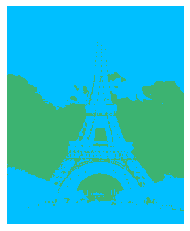


Euclidien Distance Metrics 
 [[0.         0.69471859]
 [0.69471859 0.        ]]

Started for k value = 3

Fitting model on a small sub-sample of the data
Predicting color indices on the full image for 3 Clusters

 SSE : 26.65605763828524


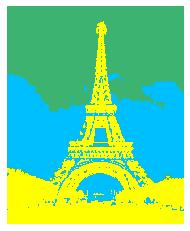


Euclidien Distance Metrics 
 [[0.         0.62362286 0.51452087]
 [0.62362286 0.         0.8754631 ]
 [0.51452087 0.8754631  0.        ]]

Started for k value = 6

Fitting model on a small sub-sample of the data
Predicting color indices on the full image for 6 Clusters

 SSE : 11.680467966790445


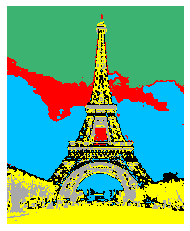


Euclidien Distance Metrics 
 [[0.         0.70479854 0.50324317 0.27149344 0.44910905 0.63743894]
 [0.70479854 0.         0.86798931 0.43680367 0.48481099 1.14550792]
 [0.50324317 0.86798931 0.         0.60215268 0.38797771 0.30040939]
 [0.27149344 0.43680367 0.60215268 0.         0.34527479 0.82166738]
 [0.44910905 0.48481099 0.38797771 0.34527479 0.         0.67197647]
 [0.63743894 1.14550792 0.30040939 0.82166738 0.67197647 0.        ]]

Started for k value = 10

Fitting model on a small sub-sample of the data
Predicting color indices on the full image for 10 Clusters

 SSE : 5.632186161627544


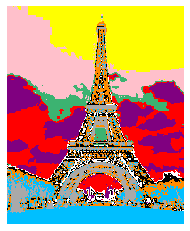


Euclidien Distance Metrics 
 [[0.         0.69809859 0.3883007  0.2908059  0.34748067 0.87327839
  0.52258129 0.45951485 0.24766031 0.32148653]
 [0.69809859 0.         0.54761369 0.87291068 0.42132807 0.27742685
  0.19252961 1.01994514 0.60342316 0.71424731]
 [0.3883007  0.54761369 0.         0.67618478 0.46168094 0.60922284
  0.40442709 0.8464595  0.14524358 0.64556968]
 [0.2908059  0.87291068 0.67618478 0.         0.45992486 1.09057856
  0.71118735 0.17090287 0.53805313 0.20454446]
 [0.34748067 0.42132807 0.46168094 0.45992486 0.         0.65001709
  0.26723912 0.60432484 0.40547857 0.30013103]
 [0.87327839 0.27742685 0.60922284 1.09057856 0.65001709 0.
  0.38349617 1.24768651 0.71435724 0.95001379]
 [0.52258129 0.19252961 0.40442709 0.71118735 0.26723912 0.38349617
  0.         0.86519875 0.43858911 0.56678886]
 [0.45951485 1.01994514 0.8464595  0.17090287 0.60432484 1.24768651
  0.86519875 0.         0.70714465 0.31289121]
 [0.24766031 0.60342316 0.14524358 0.53805313 0.40547857 0

In [10]:
SSE_list = []
for k in k_list:
    print("\nStarted for k value = {}\n".format(k))
    sse = get_clusterd_img(image=img, n_clustes=k, iterations=50)
    SSE_list.append(sse)

### SSE for each K

In [11]:
SSE_list

[69.39085909795054, 26.65605763828524, 11.680467966790445, 5.632186161627544]

################### END ##############################